In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [5]:
## Data

## Customers 
customers_account_activity = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/account_activity.csv")
customers_customer_data = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/customer_data.csv")

## Fraudulents Patterns
fraud_fraud_indicators = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/fraud_indicators.csv")
fraud_suspicious_activity = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/suspicious_activity.csv")

## Merchant
merchants_merchant_data = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/merchant_data.csv")
merchants_transaction_category_labels = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/transaction_category_labels.csv")

## Transactions Amount
transactions_amount_data = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/amount_data.csv")
transactions_anomaly_scores = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/anomaly_scores.csv")

## Transactions Data
transactions_data_records = pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/transaction_records.csv")
transactions_data_metadata= pd.read_csv("https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/transaction_metadata.csv")

In [6]:
# Rapide traitement des données
def explore_df(df, name=""):
    print(f"Exploration de {name}")
    print("Dimension :", df.shape)
    print("Colonnes et types :\n", df.dtypes)
    print("Valeurs manquantes par colonne :\n", df.isnull().sum())
    print("Aperçu des premières lignes :")
    print(df.head(3))
    print("\n\n")

explore_df(transactions, "transactions")
explore_df(customers, "customers")
explore_df(merchants, "merchants")
explore_df(transactions_categories, "transactions_categories")
explore_df(fraud_indic, "fraud_indic")

NameError: name 'transactions' is not defined

In [ ]:
# Nettoyage (Ici inutile car aucune valeur manquante, mais il y en a dans les autres datasets)
def preprocess_table(df, drop_cols=None, fill_strategy="mean"):
    # On enlève les colonnes inutiles
    if drop_cols:
        df = df.drop(columns=drop_cols, errors="ignore")
    # On complète les valeurs manquantes
    if fill_strategy == "mean":
        imp = SimpleImputer(strategy="mean")
        for col in df.select_dtypes(include=[np.number]).columns:
            df[col] = imp.fit_transform(df[[col]])
    elif fill_strategy == "median":
        imp = SimpleImputer(strategy="median")
        for col in df.select_dtypes(include=[np.number]).columns:
            df[col] = imp.fit_transform(df[[col]])
    else:
        pass # à modifier potentiellement

    return df

# On peut changer la médiane par la moyenne ou par le précédent/suivant selon les besoins et les datasets
transactions = preprocess_table(transactions,
                                drop_cols=None,
                                fill_strategy="median")

customers = preprocess_table(customers,
                             drop_cols=None,
                             fill_strategy="median")

merchants = preprocess_table(merchants,
                             drop_cols=None,
                             fill_strategy="median")

transactions_categories = preprocess_table(transactions_categories,
                                  drop_cols=None,
                                  fill_strategy="median")

fraud_indic = preprocess_table(fraud_indic,
                               drop_cols=None,
                               fill_strategy="median")

/tmp/ipykernel_55762/3299424433.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])
/tmp/ipykernel_55762/3299424433.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])
/tmp/ipykernel_55762/3299424433.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])
/tmp/ipykernel_55762/3299424433.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[co

Accuracy: 0.955


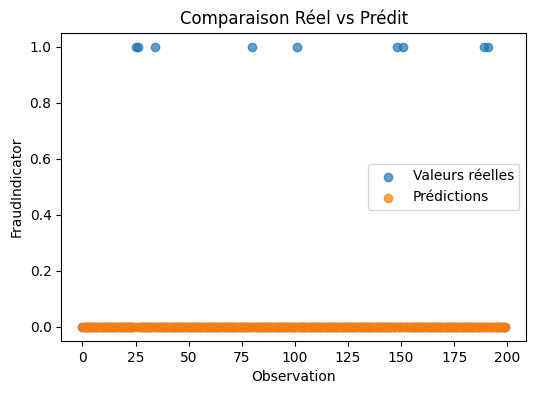

AUC: 0.524
Seuil optimal (Youden): 0.055


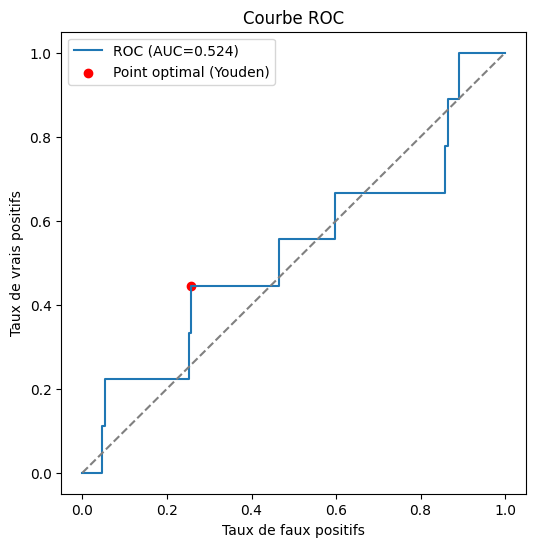

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Charger la base
url = "https://raw.githubusercontent.com/LarrySANDJO/PROJET_STATAPP/refs/heads/Branche_Larry_Balthazar/Data/Raws/Raw_data.csv"
df = pd.read_csv(url)

# Séparer cible et variables explicatives
y = df["FraudIndicator"]
X = df.drop(columns=["FraudIndicator"])

# -> conversion des dates et encodage des catégories
for col in X.columns:
    # Essai de conversion en datetime
    try:
        X[col] = pd.to_datetime(X[col])
        X[col] = X[col].astype('int64') // 10**9
    except (ValueError, TypeError):
        pass

# -> encodage one-hot pour le texte
X = pd.get_dummies(X, drop_first=True)

# Échantillonnage 80/20 avec random.sample
random.seed(42)
indices = list(df.index)
train_idx = random.sample(indices, int(0.8 * len(indices)))
test_idx = [i for i in indices if i not in train_idx]

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

# Régression logistique (car variable cible binaire)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Graphe: valeurs réelles vs prédictions
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Valeurs réelles", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Prédictions", alpha=0.7)
plt.legend()
plt.title("Comparaison Réel vs Prédit")
plt.xlabel("Observation")
plt.ylabel("FraudIndicator")
plt.show()

# Courbe ROC et indice de Youden
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
youden_index = tpr - fpr
best_thresh = thresholds[np.argmax(youden_index)]
print(f"AUC: {auc:.3f}")
print(f"Seuil optimal (Youden): {best_thresh:.3f}")

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC (AUC={auc:.3f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)],
            color="red", label="Point optimal (Youden)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


Ici, on remarque plusieurs éléments :

- Tout d'abord, la régression logistique ne permet pas de prévoir le comportement du dataset,
- Ensuite, le AUC du ROC Chart est très proche de 0,5 donc le modèle n'a que très peu de capacité de prédiction de la réalité,
- Enfin, l'indice de Youden est proche de la moitié, donc on ne connaît pas la proportion d'erreurs de type 1 et de type 2.